In [1]:
def create_dataset(directory):
    #before work
    import cv2
    import glob
    files=glob.glob(directory+'/*.jpeg')
    dataset=[]
    labels=[]
    for file in files:
        img=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        dataset.append(img)
        #write your code
        if "virus" in file:
            labels.append("0")
        elif "bacteria" in file:
            labels.append("1")
        else:
            labels.append("2")

    from numpy import asarray
    dataset=asarray(dataset).astype('float32')
    dataset=dataset/255.0
    return dataset,labels

In [2]:
dataset,labels=create_dataset('chest_xray_lower_dim2')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras import utils
import sklearn.metrics as metrics
import numpy as np
from tensorflow.keras import regularizers
import math

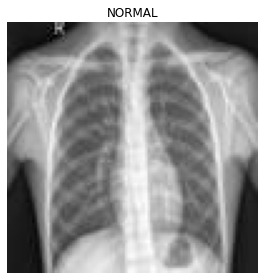

In [40]:
import matplotlib.pyplot as plt
plt.title("NORMAL")
plt.imshow(dataset[0], cmap='gray')    
plt.axis('off')
plt.tight_layout()

In [12]:
#με αυτό το score για 2η φάση α
def train(dividor_epoch,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    Inp=layers.Input(shape=(100,100,1))
    hidden=layers.Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu')(Inp)
    hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
    hidden=layers.Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
    hidden=layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(hidden)
    hidden=layers.Flatten()(hidden)
    for i in range(3):
        hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/76.4, maxval=1/76.4, seed=None))(hidden)
    output=layers.Dense(3,activation="softmax")(hidden)
    model=keras.Model(Inp,output)
    model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=tf.keras.metrics.CategoricalAccuracy())
    model.fit(X_train,Y_train,validation_split=0.2,epochs=int(len(X_train)/dividor_epoch),batch_size=batch_len,verbose=2)
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [4]:
train(100,200)

Epoch 1/46
19/19 - 15s - loss: 1.0780 - categorical_accuracy: 0.4780 - val_loss: 1.0550 - val_categorical_accuracy: 0.4813 - 15s/epoch - 787ms/step
Epoch 2/46
19/19 - 10s - loss: 1.0531 - categorical_accuracy: 0.4788 - val_loss: 1.0479 - val_categorical_accuracy: 0.4813 - 10s/epoch - 536ms/step
Epoch 3/46
19/19 - 10s - loss: 1.0253 - categorical_accuracy: 0.4788 - val_loss: 0.9825 - val_categorical_accuracy: 0.4813 - 10s/epoch - 510ms/step
Epoch 4/46
19/19 - 10s - loss: 0.9171 - categorical_accuracy: 0.4788 - val_loss: 0.9009 - val_categorical_accuracy: 0.4813 - 10s/epoch - 505ms/step
Epoch 5/46
19/19 - 10s - loss: 0.8618 - categorical_accuracy: 0.6120 - val_loss: 0.8502 - val_categorical_accuracy: 0.6457 - 10s/epoch - 522ms/step
Epoch 6/46
19/19 - 9s - loss: 0.8265 - categorical_accuracy: 0.6675 - val_loss: 0.8366 - val_categorical_accuracy: 0.6233 - 9s/epoch - 451ms/step
Epoch 7/46
19/19 - 9s - loss: 0.7974 - categorical_accuracy: 0.6739 - val_loss: 0.7900 - val_categorical_accuracy:

 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 161,693
Trainable params: 161,693
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5399441123008728
Test accuracy: 0.7662116289138794


In [5]:
train(50,200)

Epoch 1/93
19/19 - 9s - loss: 1.0815 - categorical_accuracy: 0.4788 - val_loss: 1.0628 - val_categorical_accuracy: 0.4813 - 9s/epoch - 475ms/step
Epoch 2/93
19/19 - 8s - loss: 1.0550 - categorical_accuracy: 0.4788 - val_loss: 1.0500 - val_categorical_accuracy: 0.4813 - 8s/epoch - 420ms/step
Epoch 3/93
19/19 - 10s - loss: 1.0403 - categorical_accuracy: 0.4788 - val_loss: 1.0251 - val_categorical_accuracy: 0.4813 - 10s/epoch - 528ms/step
Epoch 4/93
19/19 - 10s - loss: 0.9652 - categorical_accuracy: 0.4788 - val_loss: 0.9080 - val_categorical_accuracy: 0.4813 - 10s/epoch - 543ms/step
Epoch 5/93
19/19 - 11s - loss: 0.8648 - categorical_accuracy: 0.5746 - val_loss: 0.8422 - val_categorical_accuracy: 0.6371 - 11s/epoch - 590ms/step
Epoch 6/93
19/19 - 10s - loss: 0.8329 - categorical_accuracy: 0.6568 - val_loss: 0.8189 - val_categorical_accuracy: 0.6521 - 10s/epoch - 513ms/step
Epoch 7/93
19/19 - 8s - loss: 0.7901 - categorical_accuracy: 0.6805 - val_loss: 0.7817 - val_categorical_accuracy: 0

Epoch 57/93
19/19 - 8s - loss: 0.4264 - categorical_accuracy: 0.8199 - val_loss: 0.5482 - val_categorical_accuracy: 0.7641 - 8s/epoch - 414ms/step
Epoch 58/93
19/19 - 8s - loss: 0.4141 - categorical_accuracy: 0.8199 - val_loss: 0.5362 - val_categorical_accuracy: 0.7748 - 8s/epoch - 431ms/step
Epoch 59/93
19/19 - 8s - loss: 0.4142 - categorical_accuracy: 0.8271 - val_loss: 0.5325 - val_categorical_accuracy: 0.7769 - 8s/epoch - 418ms/step
Epoch 60/93
19/19 - 9s - loss: 0.4053 - categorical_accuracy: 0.8271 - val_loss: 0.5483 - val_categorical_accuracy: 0.7705 - 9s/epoch - 459ms/step
Epoch 61/93
19/19 - 9s - loss: 0.4073 - categorical_accuracy: 0.8247 - val_loss: 0.5326 - val_categorical_accuracy: 0.7759 - 9s/epoch - 450ms/step
Epoch 62/93
19/19 - 8s - loss: 0.4051 - categorical_accuracy: 0.8249 - val_loss: 0.5523 - val_categorical_accuracy: 0.7684 - 8s/epoch - 429ms/step
Epoch 63/93
19/19 - 8s - loss: 0.3964 - categorical_accuracy: 0.8313 - val_loss: 0.5310 - val_categorical_accuracy: 0.

In [6]:
train(200,200)

Epoch 1/23
19/19 - 10s - loss: 1.0765 - categorical_accuracy: 0.4614 - val_loss: 1.0598 - val_categorical_accuracy: 0.4813 - 10s/epoch - 502ms/step
Epoch 2/23
19/19 - 9s - loss: 1.0515 - categorical_accuracy: 0.4788 - val_loss: 1.0410 - val_categorical_accuracy: 0.4813 - 9s/epoch - 451ms/step
Epoch 3/23
19/19 - 9s - loss: 0.9870 - categorical_accuracy: 0.4908 - val_loss: 0.9341 - val_categorical_accuracy: 0.5891 - 9s/epoch - 498ms/step
Epoch 4/23
19/19 - 10s - loss: 0.8811 - categorical_accuracy: 0.6504 - val_loss: 0.8623 - val_categorical_accuracy: 0.6211 - 10s/epoch - 533ms/step
Epoch 5/23
19/19 - 9s - loss: 0.7789 - categorical_accuracy: 0.6688 - val_loss: 0.7663 - val_categorical_accuracy: 0.6606 - 9s/epoch - 458ms/step
Epoch 6/23
19/19 - 8s - loss: 0.6943 - categorical_accuracy: 0.6861 - val_loss: 0.7158 - val_categorical_accuracy: 0.6724 - 8s/epoch - 440ms/step
Epoch 7/23
19/19 - 8s - loss: 0.6509 - categorical_accuracy: 0.7120 - val_loss: 0.7060 - val_categorical_accuracy: 0.673

In [13]:
train(100,50)

Epoch 1/46
75/75 - 9s - loss: 1.0575 - categorical_accuracy: 0.4686 - val_loss: 1.0117 - val_categorical_accuracy: 0.4813 - 9s/epoch - 124ms/step
Epoch 2/46
75/75 - 10s - loss: 0.8165 - categorical_accuracy: 0.6298 - val_loss: 0.7337 - val_categorical_accuracy: 0.6649 - 10s/epoch - 128ms/step
Epoch 3/46
75/75 - 10s - loss: 0.6791 - categorical_accuracy: 0.6990 - val_loss: 0.7180 - val_categorical_accuracy: 0.6724 - 10s/epoch - 129ms/step
Epoch 4/46
75/75 - 13s - loss: 0.6333 - categorical_accuracy: 0.7118 - val_loss: 0.6545 - val_categorical_accuracy: 0.6980 - 13s/epoch - 167ms/step
Epoch 5/46
75/75 - 12s - loss: 0.6145 - categorical_accuracy: 0.7219 - val_loss: 0.6214 - val_categorical_accuracy: 0.7118 - 12s/epoch - 157ms/step
Epoch 6/46
75/75 - 9s - loss: 0.6037 - categorical_accuracy: 0.7259 - val_loss: 0.6189 - val_categorical_accuracy: 0.7172 - 9s/epoch - 122ms/step
Epoch 7/46
75/75 - 9s - loss: 0.5967 - categorical_accuracy: 0.7224 - val_loss: 0.6009 - val_categorical_accuracy: 0

                                                                 
 dense_27 (Dense)            (None, 3)                 93        
                                                                 
Total params: 161,693
Trainable params: 161,693
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5521052479743958
Test accuracy: 0.7781569957733154


In [14]:
train(150,50)

Epoch 1/31
75/75 - 10s - loss: 1.0515 - categorical_accuracy: 0.4796 - val_loss: 0.9961 - val_categorical_accuracy: 0.4813 - 10s/epoch - 133ms/step
Epoch 2/31
75/75 - 11s - loss: 0.8764 - categorical_accuracy: 0.5834 - val_loss: 0.8146 - val_categorical_accuracy: 0.6617 - 11s/epoch - 149ms/step
Epoch 3/31
75/75 - 10s - loss: 0.7750 - categorical_accuracy: 0.6861 - val_loss: 0.7640 - val_categorical_accuracy: 0.6820 - 10s/epoch - 128ms/step
Epoch 4/31
75/75 - 12s - loss: 0.7041 - categorical_accuracy: 0.7166 - val_loss: 0.6812 - val_categorical_accuracy: 0.7033 - 12s/epoch - 154ms/step
Epoch 5/31
75/75 - 10s - loss: 0.6454 - categorical_accuracy: 0.7286 - val_loss: 0.6920 - val_categorical_accuracy: 0.6820 - 10s/epoch - 136ms/step
Epoch 6/31
75/75 - 9s - loss: 0.6156 - categorical_accuracy: 0.7339 - val_loss: 0.6134 - val_categorical_accuracy: 0.7375 - 9s/epoch - 125ms/step
Epoch 7/31
75/75 - 10s - loss: 0.5824 - categorical_accuracy: 0.7502 - val_loss: 0.6069 - val_categorical_accuracy

In [4]:
def train(dividor_epoch,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    Inp=layers.Input(shape=(100,100,1))
    hidden=layers.Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu')(Inp)
    hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
    hidden=layers.Flatten()(hidden)
    for i in range(3):
        hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(0.0001),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/76.4, maxval=1/76.4, seed=None))(hidden)
        #hidden=layers.Dropout(0.2)(hidden)
    output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.0001))(hidden)
    model=keras.Model(Inp,output)
    model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=tf.keras.metrics.CategoricalAccuracy())
    model.fit(X_train,Y_train,validation_split=0.2,epochs=int(len(X_train)/dividor_epoch),batch_size=batch_len,verbose=2)
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [28]:
train(100,50)

Epoch 1/46
75/75 - 7s - loss: 1.0258 - categorical_accuracy: 0.4785 - val_loss: 0.9269 - val_categorical_accuracy: 0.4813 - 7s/epoch - 89ms/step
Epoch 2/46
75/75 - 6s - loss: 0.8441 - categorical_accuracy: 0.6336 - val_loss: 0.7818 - val_categorical_accuracy: 0.6510 - 6s/epoch - 82ms/step
Epoch 3/46
75/75 - 7s - loss: 0.6739 - categorical_accuracy: 0.6974 - val_loss: 0.6918 - val_categorical_accuracy: 0.6905 - 7s/epoch - 96ms/step
Epoch 4/46
75/75 - 7s - loss: 0.6241 - categorical_accuracy: 0.7219 - val_loss: 0.6351 - val_categorical_accuracy: 0.7097 - 7s/epoch - 90ms/step
Epoch 5/46
75/75 - 7s - loss: 0.6029 - categorical_accuracy: 0.7353 - val_loss: 0.6116 - val_categorical_accuracy: 0.7353 - 7s/epoch - 87ms/step
Epoch 6/46
75/75 - 6s - loss: 0.5935 - categorical_accuracy: 0.7454 - val_loss: 0.6148 - val_categorical_accuracy: 0.7268 - 6s/epoch - 83ms/step
Epoch 7/46
75/75 - 6s - loss: 0.5950 - categorical_accuracy: 0.7494 - val_loss: 0.5982 - val_categorical_accuracy: 0.7513 - 6s/epo

Test loss: 1.2142817974090576
Test accuracy: 0.7687713503837585


In [29]:
def train(dividor_epoch,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    Inp=layers.Input(shape=(100,100,1))
    hidden=layers.Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu')(Inp)
    hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
    hidden=layers.Flatten()(hidden)
    for i in range(3):
        hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(0.0001),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
        #hidden=layers.Dropout(0.2)(hidden)
    output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.0001),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
    model=keras.Model(Inp,output)
    model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=tf.keras.metrics.CategoricalAccuracy())
    model.fit(X_train,Y_train,validation_split=0.2,epochs=int(len(X_train)/dividor_epoch),batch_size=batch_len,verbose=2)
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [31]:
train(100,50)

Epoch 1/46
75/75 - 8s - loss: 0.8340 - categorical_accuracy: 0.6216 - val_loss: 0.7011 - val_categorical_accuracy: 0.6926 - 8s/epoch - 107ms/step
Epoch 2/46
75/75 - 9s - loss: 0.6478 - categorical_accuracy: 0.7144 - val_loss: 0.6224 - val_categorical_accuracy: 0.7289 - 9s/epoch - 123ms/step
Epoch 3/46
75/75 - 8s - loss: 0.6144 - categorical_accuracy: 0.7374 - val_loss: 0.6757 - val_categorical_accuracy: 0.7054 - 8s/epoch - 101ms/step
Epoch 4/46
75/75 - 7s - loss: 0.5658 - categorical_accuracy: 0.7622 - val_loss: 0.6344 - val_categorical_accuracy: 0.7279 - 7s/epoch - 96ms/step
Epoch 5/46
75/75 - 7s - loss: 0.5775 - categorical_accuracy: 0.7622 - val_loss: 0.6077 - val_categorical_accuracy: 0.7332 - 7s/epoch - 92ms/step
Epoch 6/46
75/75 - 7s - loss: 0.5488 - categorical_accuracy: 0.7691 - val_loss: 0.6069 - val_categorical_accuracy: 0.7321 - 7s/epoch - 96ms/step
Epoch 7/46
75/75 - 7s - loss: 0.5288 - categorical_accuracy: 0.7777 - val_loss: 0.5559 - val_categorical_accuracy: 0.7524 - 7s/

_________________________________________________________________
Test loss: 1.41386878490448
Test accuracy: 0.7517064809799194


In [5]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(dividor_epoch,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=layers.Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu')(Inp)
        hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(3):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            #hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=int(len(X_train)/dividor_epoch),batch_size=batch_len,verbose=2,callbacks=callbacks_list)
    model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [8]:
train(100,150)

C:\Users\manos\AppData\Local\Temp/ipykernel_20532/2202079281.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)


Epoch 1/46
28/28 - 6s - loss: 0.9926 - accuracy: 0.5142 - 6s/epoch - 219ms/step
Epoch 2/46
28/28 - 6s - loss: 0.7295 - accuracy: 0.7008 - 6s/epoch - 201ms/step
Epoch 3/46
28/28 - 6s - loss: 0.5935 - accuracy: 0.7430 - 6s/epoch - 232ms/step
Epoch 4/46
28/28 - 6s - loss: 0.5621 - accuracy: 0.7562 - 6s/epoch - 215ms/step
Epoch 5/46
28/28 - 7s - loss: 0.5405 - accuracy: 0.7679 - 7s/epoch - 235ms/step
Epoch 6/46
28/28 - 6s - loss: 0.5505 - accuracy: 0.7638 - 6s/epoch - 229ms/step
Epoch 7/46
28/28 - 9s - loss: 0.5296 - accuracy: 0.7753 - 9s/epoch - 307ms/step
Epoch 8/46
28/28 - 8s - loss: 0.5377 - accuracy: 0.7626 - 8s/epoch - 276ms/step
Epoch 9/46
28/28 - 8s - loss: 0.4951 - accuracy: 0.7889 - 8s/epoch - 297ms/step
Epoch 10/46
28/28 - 6s - loss: 0.4975 - accuracy: 0.7914 - 6s/epoch - 213ms/step
Epoch 11/46
28/28 - 6s - loss: 0.4913 - accuracy: 0.7897 - 6s/epoch - 215ms/step
Epoch 12/46
28/28 - 6s - loss: 0.4798 - accuracy: 0.7948 - 6s/epoch - 214ms/step
Epoch 13/46
28/28 - 6s - loss: 0.4891

Epoch 9/46
28/28 - 6s - loss: 0.5107 - accuracy: 0.7804 - 6s/epoch - 200ms/step
Epoch 10/46
28/28 - 6s - loss: 0.5029 - accuracy: 0.7867 - 6s/epoch - 200ms/step
Epoch 11/46
28/28 - 6s - loss: 0.4995 - accuracy: 0.7887 - 6s/epoch - 206ms/step
Epoch 12/46
28/28 - 6s - loss: 0.4817 - accuracy: 0.7958 - 6s/epoch - 204ms/step
Epoch 13/46
28/28 - 6s - loss: 0.4858 - accuracy: 0.7906 - 6s/epoch - 206ms/step
Epoch 14/46
28/28 - 6s - loss: 0.4593 - accuracy: 0.8055 - 6s/epoch - 213ms/step
Epoch 15/46
28/28 - 6s - loss: 0.4599 - accuracy: 0.8048 - 6s/epoch - 199ms/step
Epoch 16/46
28/28 - 6s - loss: 0.4443 - accuracy: 0.8114 - 6s/epoch - 207ms/step
Epoch 17/46
28/28 - 6s - loss: 0.4454 - accuracy: 0.8141 - 6s/epoch - 198ms/step
Epoch 18/46
28/28 - 6s - loss: 0.4274 - accuracy: 0.8119 - 6s/epoch - 228ms/step
Epoch 19/46
28/28 - 6s - loss: 0.4209 - accuracy: 0.8243 - 6s/epoch - 217ms/step
Epoch 20/46
28/28 - 6s - loss: 0.4158 - accuracy: 0.8287 - 6s/epoch - 224ms/step
Epoch 21/46
28/28 - 7s - loss

Epoch 17/46
28/28 - 6s - loss: 0.4382 - accuracy: 0.8092 - 6s/epoch - 196ms/step
Epoch 18/46
28/28 - 6s - loss: 0.4723 - accuracy: 0.7941 - 6s/epoch - 204ms/step
Epoch 19/46
28/28 - 6s - loss: 0.4478 - accuracy: 0.8039 - 6s/epoch - 201ms/step
Epoch 20/46
28/28 - 6s - loss: 0.4323 - accuracy: 0.8139 - 6s/epoch - 200ms/step
Epoch 21/46
28/28 - 6s - loss: 0.4159 - accuracy: 0.8258 - 6s/epoch - 208ms/step
Epoch 22/46
28/28 - 6s - loss: 0.4010 - accuracy: 0.8256 - 6s/epoch - 201ms/step
Epoch 23/46
28/28 - 6s - loss: 0.3763 - accuracy: 0.8378 - 6s/epoch - 200ms/step
Epoch 24/46
28/28 - 6s - loss: 0.3743 - accuracy: 0.8346 - 6s/epoch - 206ms/step
Epoch 25/46
28/28 - 5s - loss: 0.3849 - accuracy: 0.8356 - 5s/epoch - 195ms/step
Epoch 26/46
28/28 - 6s - loss: 0.3805 - accuracy: 0.8348 - 6s/epoch - 204ms/step
Epoch 27/46
28/28 - 6s - loss: 0.3486 - accuracy: 0.8514 - 6s/epoch - 206ms/step
Epoch 28/46
28/28 - 6s - loss: 0.3397 - accuracy: 0.8587 - 6s/epoch - 199ms/step
Epoch 29/46
28/28 - 6s - los

Epoch 25/46
28/28 - 6s - loss: 0.4336 - accuracy: 0.8178 - 6s/epoch - 203ms/step
Epoch 26/46
28/28 - 6s - loss: 0.4389 - accuracy: 0.8112 - 6s/epoch - 209ms/step
Epoch 27/46
28/28 - 6s - loss: 0.4254 - accuracy: 0.8222 - 6s/epoch - 203ms/step
Epoch 28/46
28/28 - 6s - loss: 0.4046 - accuracy: 0.8300 - 6s/epoch - 209ms/step
Epoch 29/46
28/28 - 6s - loss: 0.4147 - accuracy: 0.8261 - 6s/epoch - 218ms/step
Epoch 30/46
28/28 - 6s - loss: 0.3974 - accuracy: 0.8322 - 6s/epoch - 203ms/step
Epoch 31/46
28/28 - 6s - loss: 0.4278 - accuracy: 0.8180 - 6s/epoch - 205ms/step
Epoch 32/46
28/28 - 6s - loss: 0.3828 - accuracy: 0.8419 - 6s/epoch - 210ms/step
Epoch 33/46
28/28 - 6s - loss: 0.3754 - accuracy: 0.8436 - 6s/epoch - 201ms/step
Epoch 34/46
28/28 - 6s - loss: 0.3667 - accuracy: 0.8465 - 6s/epoch - 205ms/step
Epoch 35/46
28/28 - 6s - loss: 0.3681 - accuracy: 0.8461 - 6s/epoch - 208ms/step
Epoch 36/46
28/28 - 6s - loss: 0.3449 - accuracy: 0.8531 - 6s/epoch - 203ms/step
Epoch 37/46
28/28 - 6s - los

Epoch 14/46

Epoch 14: val_accuracy improved from 0.75774 to 0.75880, saving model to weights.hdf5
25/25 - 6s - loss: 0.4813 - accuracy: 0.7956 - val_loss: 0.5462 - val_accuracy: 0.7588 - 6s/epoch - 232ms/step
Epoch 15/46

Epoch 15: val_accuracy improved from 0.75880 to 0.76414, saving model to weights.hdf5
25/25 - 6s - loss: 0.4697 - accuracy: 0.8030 - val_loss: 0.5257 - val_accuracy: 0.7641 - 6s/epoch - 244ms/step
Epoch 16/46

Epoch 16: val_accuracy did not improve from 0.76414
25/25 - 6s - loss: 0.4615 - accuracy: 0.8076 - val_loss: 0.5301 - val_accuracy: 0.7609 - 6s/epoch - 222ms/step
Epoch 17/46

Epoch 17: val_accuracy did not improve from 0.76414
25/25 - 6s - loss: 0.4488 - accuracy: 0.8070 - val_loss: 0.5245 - val_accuracy: 0.7567 - 6s/epoch - 225ms/step
Epoch 18/46

Epoch 18: val_accuracy did not improve from 0.76414
25/25 - 6s - loss: 0.4423 - accuracy: 0.8164 - val_loss: 0.5167 - val_accuracy: 0.7631 - 6s/epoch - 232ms/step
Epoch 19/46

Epoch 19: val_accuracy improved from 0.

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(2):
            hidden=layers.Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(1,1))(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(5):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            #hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2)
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [25]:
train(30,200)

Epoch 1/30
19/19 - 28s - loss: 1.0171 - accuracy: 0.5044 - val_loss: 0.8950 - val_accuracy: 0.6339 - 28s/epoch - 1s/step
Epoch 2/30
19/19 - 26s - loss: 0.7742 - accuracy: 0.6595 - val_loss: 0.7092 - val_accuracy: 0.6948 - 26s/epoch - 1s/step
Epoch 3/30
19/19 - 26s - loss: 0.6319 - accuracy: 0.7238 - val_loss: 0.6364 - val_accuracy: 0.7182 - 26s/epoch - 1s/step
Epoch 4/30
19/19 - 26s - loss: 0.5573 - accuracy: 0.7670 - val_loss: 0.5801 - val_accuracy: 0.7449 - 26s/epoch - 1s/step
Epoch 5/30
19/19 - 25s - loss: 0.5644 - accuracy: 0.7713 - val_loss: 0.6047 - val_accuracy: 0.7460 - 25s/epoch - 1s/step
Epoch 6/30
19/19 - 26s - loss: 0.5452 - accuracy: 0.7697 - val_loss: 0.5508 - val_accuracy: 0.7631 - 26s/epoch - 1s/step
Epoch 7/30
19/19 - 26s - loss: 0.5079 - accuracy: 0.7857 - val_loss: 0.5617 - val_accuracy: 0.7577 - 26s/epoch - 1s/step
Epoch 8/30
19/19 - 26s - loss: 0.5032 - accuracy: 0.7881 - val_loss: 0.5327 - val_accuracy: 0.7673 - 26s/epoch - 1s/step
Epoch 9/30
19/19 - 27s - loss: 0

In [26]:
train(15,200)

Epoch 1/15
19/19 - 27s - loss: 1.0437 - accuracy: 0.4662 - val_loss: 0.9704 - val_accuracy: 0.4888 - 27s/epoch - 1s/step
Epoch 2/15
19/19 - 29s - loss: 0.8498 - accuracy: 0.6317 - val_loss: 0.7418 - val_accuracy: 0.6606 - 29s/epoch - 2s/step
Epoch 3/15
19/19 - 25s - loss: 0.6978 - accuracy: 0.6867 - val_loss: 0.6830 - val_accuracy: 0.6884 - 25s/epoch - 1s/step
Epoch 4/15
19/19 - 25s - loss: 0.6259 - accuracy: 0.7232 - val_loss: 0.6188 - val_accuracy: 0.7022 - 25s/epoch - 1s/step
Epoch 5/15
19/19 - 25s - loss: 0.5738 - accuracy: 0.7355 - val_loss: 0.5877 - val_accuracy: 0.7289 - 25s/epoch - 1s/step
Epoch 6/15
19/19 - 26s - loss: 0.5967 - accuracy: 0.7310 - val_loss: 0.6840 - val_accuracy: 0.6873 - 26s/epoch - 1s/step
Epoch 7/15
19/19 - 25s - loss: 0.5986 - accuracy: 0.7353 - val_loss: 0.5805 - val_accuracy: 0.7524 - 25s/epoch - 1s/step
Epoch 8/15
19/19 - 25s - loss: 0.5703 - accuracy: 0.7491 - val_loss: 0.6242 - val_accuracy: 0.7097 - 25s/epoch - 1s/step
Epoch 9/15
19/19 - 25s - loss: 0

In [27]:
train(60,200)

Epoch 1/60
19/19 - 25s - loss: 1.0676 - accuracy: 0.4486 - val_loss: 1.0430 - val_accuracy: 0.4813 - 25s/epoch - 1s/step
Epoch 2/60
19/19 - 25s - loss: 0.9329 - accuracy: 0.5687 - val_loss: 0.8455 - val_accuracy: 0.6478 - 25s/epoch - 1s/step
Epoch 3/60
19/19 - 25s - loss: 0.7314 - accuracy: 0.6709 - val_loss: 0.6763 - val_accuracy: 0.6649 - 25s/epoch - 1s/step
Epoch 4/60
19/19 - 27s - loss: 0.5931 - accuracy: 0.7294 - val_loss: 0.6178 - val_accuracy: 0.7257 - 27s/epoch - 1s/step
Epoch 5/60
19/19 - 32s - loss: 0.5389 - accuracy: 0.7732 - val_loss: 0.5820 - val_accuracy: 0.7407 - 32s/epoch - 2s/step
Epoch 6/60
19/19 - 27s - loss: 0.5116 - accuracy: 0.7817 - val_loss: 0.5535 - val_accuracy: 0.7449 - 27s/epoch - 1s/step
Epoch 7/60
19/19 - 28s - loss: 0.5156 - accuracy: 0.7750 - val_loss: 0.6455 - val_accuracy: 0.7033 - 28s/epoch - 1s/step
Epoch 8/60
19/19 - 29s - loss: 0.4926 - accuracy: 0.7916 - val_loss: 0.5501 - val_accuracy: 0.7588 - 29s/epoch - 2s/step
Epoch 9/60
19/19 - 32s - loss: 0

                                                                 
 flatten_33 (Flatten)        (None, 88360)             0         
                                                                 
 dense_142 (Dense)           (None, 30)                2650830   
                                                                 
 dense_143 (Dense)           (None, 30)                930       
                                                                 
 dense_144 (Dense)           (None, 30)                930       
                                                                 
 dense_145 (Dense)           (None, 30)                930       
                                                                 
 dense_146 (Dense)           (None, 30)                930       
                                                                 
 dense_147 (Dense)           (None, 3)                 93        
                                                                 
Total para

In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(2):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(1,1))(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(5):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            #hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2)
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [4]:
train(60,200)

Epoch 1/60
19/19 - 32s - loss: 1.0113 - accuracy: 0.4865 - val_loss: 0.9157 - val_accuracy: 0.5699 - 32s/epoch - 2s/step
Epoch 2/60
19/19 - 25s - loss: 0.8094 - accuracy: 0.6624 - val_loss: 0.6993 - val_accuracy: 0.6830 - 25s/epoch - 1s/step
Epoch 3/60
19/19 - 25s - loss: 0.6403 - accuracy: 0.7091 - val_loss: 0.6464 - val_accuracy: 0.7097 - 25s/epoch - 1s/step
Epoch 4/60
19/19 - 25s - loss: 0.5786 - accuracy: 0.7379 - val_loss: 0.6600 - val_accuracy: 0.6926 - 25s/epoch - 1s/step
Epoch 5/60
19/19 - 26s - loss: 0.5446 - accuracy: 0.7678 - val_loss: 0.5890 - val_accuracy: 0.7268 - 26s/epoch - 1s/step
Epoch 6/60
19/19 - 25s - loss: 0.5068 - accuracy: 0.7884 - val_loss: 0.5718 - val_accuracy: 0.7481 - 25s/epoch - 1s/step
Epoch 7/60
19/19 - 25s - loss: 0.5008 - accuracy: 0.7873 - val_loss: 0.5889 - val_accuracy: 0.7257 - 25s/epoch - 1s/step
Epoch 8/60
19/19 - 25s - loss: 0.4805 - accuracy: 0.7948 - val_loss: 0.5375 - val_accuracy: 0.7609 - 25s/epoch - 1s/step
Epoch 9/60
19/19 - 25s - loss: 0

 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 88360)             0         
                                                                 
 dense (Dense)               (None, 30)                2650830   
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 3)                 93        
          

In [5]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(3):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(3):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            #hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2)
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [6]:
train(46,50)

Epoch 1/46
75/75 - 33s - loss: 1.0611 - accuracy: 0.4790 - val_loss: 1.0444 - val_accuracy: 0.4813 - 33s/epoch - 437ms/step
Epoch 2/46
75/75 - 34s - loss: 0.9259 - accuracy: 0.5559 - val_loss: 0.8252 - val_accuracy: 0.6425 - 34s/epoch - 452ms/step
Epoch 3/46
75/75 - 34s - loss: 0.7602 - accuracy: 0.6763 - val_loss: 0.7358 - val_accuracy: 0.6670 - 34s/epoch - 454ms/step
Epoch 4/46
75/75 - 41s - loss: 0.6930 - accuracy: 0.6832 - val_loss: 0.7397 - val_accuracy: 0.6692 - 41s/epoch - 548ms/step
Epoch 5/46
75/75 - 36s - loss: 0.6633 - accuracy: 0.7126 - val_loss: 0.6562 - val_accuracy: 0.7140 - 36s/epoch - 476ms/step
Epoch 6/46
75/75 - 34s - loss: 0.6149 - accuracy: 0.7345 - val_loss: 0.6279 - val_accuracy: 0.7247 - 34s/epoch - 454ms/step
Epoch 7/46
75/75 - 31s - loss: 0.5842 - accuracy: 0.7494 - val_loss: 0.6083 - val_accuracy: 0.7407 - 31s/epoch - 415ms/step
Epoch 8/46
75/75 - 31s - loss: 0.5653 - accuracy: 0.7598 - val_loss: 0.5859 - val_accuracy: 0.7567 - 31s/epoch - 413ms/step
Epoch 9/

In [9]:
train(23,100)

Epoch 1/23
38/38 - 43s - loss: 1.0651 - accuracy: 0.4753 - val_loss: 1.0548 - val_accuracy: 0.4813 - 43s/epoch - 1s/step
Epoch 2/23
38/38 - 34s - loss: 1.0274 - accuracy: 0.4935 - val_loss: 0.9048 - val_accuracy: 0.5667 - 34s/epoch - 900ms/step
Epoch 3/23
38/38 - 30s - loss: 0.7542 - accuracy: 0.6571 - val_loss: 0.7358 - val_accuracy: 0.6756 - 30s/epoch - 799ms/step
Epoch 4/23
38/38 - 28s - loss: 0.6681 - accuracy: 0.7062 - val_loss: 0.6755 - val_accuracy: 0.7054 - 28s/epoch - 731ms/step
Epoch 5/23
38/38 - 28s - loss: 0.6233 - accuracy: 0.7310 - val_loss: 0.6627 - val_accuracy: 0.7172 - 28s/epoch - 724ms/step
Epoch 6/23
38/38 - 28s - loss: 0.6181 - accuracy: 0.7395 - val_loss: 0.6496 - val_accuracy: 0.7225 - 28s/epoch - 731ms/step
Epoch 7/23
38/38 - 27s - loss: 0.5820 - accuracy: 0.7545 - val_loss: 0.6026 - val_accuracy: 0.7279 - 27s/epoch - 716ms/step
Epoch 8/23
38/38 - 29s - loss: 0.5502 - accuracy: 0.7694 - val_loss: 0.6086 - val_accuracy: 0.7300 - 29s/epoch - 754ms/step
Epoch 9/23


In [10]:
train(30,100)

Epoch 1/30
38/38 - 33s - loss: 1.0723 - accuracy: 0.4724 - val_loss: 1.0674 - val_accuracy: 0.4813 - 33s/epoch - 857ms/step
Epoch 2/30
38/38 - 28s - loss: 1.0527 - accuracy: 0.4788 - val_loss: 1.0231 - val_accuracy: 0.4813 - 28s/epoch - 734ms/step
Epoch 3/30
38/38 - 28s - loss: 0.8766 - accuracy: 0.5895 - val_loss: 0.7753 - val_accuracy: 0.6585 - 28s/epoch - 730ms/step
Epoch 4/30
38/38 - 27s - loss: 0.7053 - accuracy: 0.6856 - val_loss: 0.8068 - val_accuracy: 0.6382 - 27s/epoch - 723ms/step
Epoch 5/30
38/38 - 28s - loss: 0.6279 - accuracy: 0.7230 - val_loss: 0.6555 - val_accuracy: 0.7033 - 28s/epoch - 725ms/step
Epoch 6/30
38/38 - 28s - loss: 0.5876 - accuracy: 0.7363 - val_loss: 0.6174 - val_accuracy: 0.7086 - 28s/epoch - 732ms/step
Epoch 7/30
38/38 - 28s - loss: 0.5686 - accuracy: 0.7566 - val_loss: 0.5928 - val_accuracy: 0.7428 - 28s/epoch - 731ms/step
Epoch 8/30
38/38 - 28s - loss: 0.5261 - accuracy: 0.7732 - val_loss: 0.5909 - val_accuracy: 0.7407 - 28s/epoch - 736ms/step
Epoch 9/

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(3):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(3):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            #hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [12]:
train(30,100)

Epoch 1/30
38/38 - 43s - loss: 1.0580 - accuracy: 0.4750 - val_loss: 1.0267 - val_accuracy: 0.4813 - 43s/epoch - 1s/step
Epoch 2/30
38/38 - 35s - loss: 0.8295 - accuracy: 0.6250 - val_loss: 0.7896 - val_accuracy: 0.6371 - 35s/epoch - 924ms/step
Epoch 3/30
38/38 - 35s - loss: 0.6897 - accuracy: 0.6875 - val_loss: 0.7392 - val_accuracy: 0.6745 - 35s/epoch - 929ms/step
Epoch 4/30
38/38 - 36s - loss: 0.6460 - accuracy: 0.7091 - val_loss: 0.6633 - val_accuracy: 0.7150 - 36s/epoch - 959ms/step
Epoch 5/30
38/38 - 37s - loss: 0.6024 - accuracy: 0.7425 - val_loss: 0.6110 - val_accuracy: 0.7535 - 37s/epoch - 985ms/step
Epoch 6/30
38/38 - 51s - loss: 0.5842 - accuracy: 0.7494 - val_loss: 0.6117 - val_accuracy: 0.7321 - 51s/epoch - 1s/step
Epoch 7/30
38/38 - 37s - loss: 0.5488 - accuracy: 0.7689 - val_loss: 0.5694 - val_accuracy: 0.7567 - 37s/epoch - 984ms/step
Epoch 8/30
38/38 - 36s - loss: 0.5375 - accuracy: 0.7774 - val_loss: 0.5781 - val_accuracy: 0.7481 - 36s/epoch - 953ms/step
Epoch 9/30
38/

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(neur_layers):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            #hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [15]:
train(30,100,3,5)

Epoch 1/30
38/38 - 38s - loss: 1.0652 - accuracy: 0.4745 - val_loss: 1.0684 - val_accuracy: 0.4813 - 38s/epoch - 989ms/step
Epoch 2/30
38/38 - 31s - loss: 1.0378 - accuracy: 0.4788 - val_loss: 0.9699 - val_accuracy: 0.4813 - 31s/epoch - 825ms/step
Epoch 3/30
38/38 - 30s - loss: 0.8444 - accuracy: 0.5914 - val_loss: 0.7955 - val_accuracy: 0.6489 - 30s/epoch - 779ms/step
Epoch 4/30
38/38 - 30s - loss: 0.6933 - accuracy: 0.6864 - val_loss: 0.8176 - val_accuracy: 0.6371 - 30s/epoch - 778ms/step
Epoch 5/30
38/38 - 30s - loss: 0.6617 - accuracy: 0.6939 - val_loss: 0.6685 - val_accuracy: 0.6894 - 30s/epoch - 786ms/step
Epoch 6/30
38/38 - 30s - loss: 0.6170 - accuracy: 0.7166 - val_loss: 0.6352 - val_accuracy: 0.7012 - 30s/epoch - 799ms/step
Epoch 7/30
38/38 - 31s - loss: 0.6119 - accuracy: 0.7216 - val_loss: 0.6520 - val_accuracy: 0.6916 - 31s/epoch - 820ms/step
Epoch 8/30
38/38 - 31s - loss: 0.5880 - accuracy: 0.7358 - val_loss: 0.6111 - val_accuracy: 0.7343 - 31s/epoch - 803ms/step
Epoch 9/

In [16]:
train(30,100,4,4)

Epoch 1/30
38/38 - 38s - loss: 1.0690 - accuracy: 0.4788 - val_loss: 1.0566 - val_accuracy: 0.4813 - 38s/epoch - 995ms/step
Epoch 2/30
38/38 - 35s - loss: 1.0586 - accuracy: 0.4788 - val_loss: 1.0523 - val_accuracy: 0.4813 - 35s/epoch - 910ms/step
Epoch 3/30
38/38 - 29s - loss: 1.0343 - accuracy: 0.4788 - val_loss: 1.0162 - val_accuracy: 0.4813 - 29s/epoch - 762ms/step
Epoch 4/30
38/38 - 29s - loss: 0.8367 - accuracy: 0.6272 - val_loss: 0.7831 - val_accuracy: 0.6457 - 29s/epoch - 764ms/step
Epoch 5/30
38/38 - 33s - loss: 0.7120 - accuracy: 0.6835 - val_loss: 0.7249 - val_accuracy: 0.6841 - 33s/epoch - 869ms/step
Epoch 6/30
38/38 - 31s - loss: 0.6499 - accuracy: 0.7086 - val_loss: 0.6716 - val_accuracy: 0.6990 - 31s/epoch - 804ms/step
Epoch 7/30
38/38 - 30s - loss: 0.6365 - accuracy: 0.7155 - val_loss: 0.6428 - val_accuracy: 0.7129 - 30s/epoch - 793ms/step
Epoch 8/30
38/38 - 32s - loss: 0.5975 - accuracy: 0.7280 - val_loss: 0.6427 - val_accuracy: 0.7118 - 32s/epoch - 852ms/step
Epoch 9/

In [17]:
train(30,100,4,3)

Epoch 1/30
38/38 - 37s - loss: 1.0714 - accuracy: 0.4716 - val_loss: 1.0568 - val_accuracy: 0.4813 - 37s/epoch - 981ms/step
Epoch 2/30
38/38 - 28s - loss: 1.0529 - accuracy: 0.4788 - val_loss: 1.0429 - val_accuracy: 0.4813 - 28s/epoch - 736ms/step
Epoch 3/30
38/38 - 28s - loss: 0.9720 - accuracy: 0.5223 - val_loss: 0.8584 - val_accuracy: 0.6126 - 28s/epoch - 741ms/step
Epoch 4/30
38/38 - 28s - loss: 0.7759 - accuracy: 0.6557 - val_loss: 0.8098 - val_accuracy: 0.6382 - 28s/epoch - 736ms/step
Epoch 5/30
38/38 - 28s - loss: 0.6936 - accuracy: 0.6952 - val_loss: 0.7064 - val_accuracy: 0.6926 - 28s/epoch - 728ms/step
Epoch 6/30
38/38 - 28s - loss: 0.6558 - accuracy: 0.7102 - val_loss: 0.6691 - val_accuracy: 0.7054 - 28s/epoch - 726ms/step
Epoch 7/30
38/38 - 27s - loss: 0.6182 - accuracy: 0.7256 - val_loss: 0.6700 - val_accuracy: 0.7044 - 27s/epoch - 719ms/step
Epoch 8/30
38/38 - 28s - loss: 0.6125 - accuracy: 0.7288 - val_loss: 0.6301 - val_accuracy: 0.7129 - 28s/epoch - 728ms/step
Epoch 9/

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        for i in range(neur_layers):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(i+1,-1)), maxval=1/math.pow(76.4,math.pow(i+1,-1)), seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/math.pow(76.4,math.pow(4,-1)), maxval=1/math.pow(76.4,math.pow(4,-1)), seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [20]:
train(30,100,4,3)

Epoch 1/30
38/38 - 37s - loss: 1.0782 - accuracy: 0.4708 - val_loss: 1.0664 - val_accuracy: 0.4813 - 37s/epoch - 985ms/step
Epoch 2/30
38/38 - 30s - loss: 1.0618 - accuracy: 0.4788 - val_loss: 1.0572 - val_accuracy: 0.4813 - 30s/epoch - 800ms/step
Epoch 3/30
38/38 - 31s - loss: 1.0558 - accuracy: 0.4788 - val_loss: 1.0547 - val_accuracy: 0.4813 - 31s/epoch - 820ms/step
Epoch 4/30
38/38 - 31s - loss: 1.0508 - accuracy: 0.4788 - val_loss: 1.0476 - val_accuracy: 0.4813 - 31s/epoch - 827ms/step
Epoch 5/30
38/38 - 31s - loss: 0.9631 - accuracy: 0.5151 - val_loss: 0.8503 - val_accuracy: 0.6211 - 31s/epoch - 811ms/step
Epoch 6/30
38/38 - 29s - loss: 0.8121 - accuracy: 0.6317 - val_loss: 0.8067 - val_accuracy: 0.6329 - 29s/epoch - 768ms/step
Epoch 7/30
38/38 - 29s - loss: 0.7599 - accuracy: 0.6749 - val_loss: 0.7547 - val_accuracy: 0.6414 - 29s/epoch - 771ms/step
Epoch 8/30
38/38 - 31s - loss: 0.7225 - accuracy: 0.6845 - val_loss: 0.7200 - val_accuracy: 0.6670 - 31s/epoch - 812ms/step
Epoch 9/

In [21]:
train(30,100,4,3)

Epoch 1/30
38/38 - 33s - loss: 1.0684 - accuracy: 0.4782 - val_loss: 1.0600 - val_accuracy: 0.4813 - 33s/epoch - 869ms/step
Epoch 2/30
38/38 - 29s - loss: 1.0581 - accuracy: 0.4790 - val_loss: 1.0480 - val_accuracy: 0.4813 - 29s/epoch - 765ms/step
Epoch 3/30
38/38 - 28s - loss: 1.0177 - accuracy: 0.4788 - val_loss: 0.9953 - val_accuracy: 0.4813 - 28s/epoch - 747ms/step
Epoch 4/30
38/38 - 28s - loss: 0.9029 - accuracy: 0.5236 - val_loss: 0.8472 - val_accuracy: 0.6361 - 28s/epoch - 745ms/step
Epoch 5/30
38/38 - 29s - loss: 0.7997 - accuracy: 0.6701 - val_loss: 0.7543 - val_accuracy: 0.6542 - 29s/epoch - 753ms/step
Epoch 6/30
38/38 - 30s - loss: 0.7451 - accuracy: 0.6776 - val_loss: 0.7191 - val_accuracy: 0.6809 - 30s/epoch - 781ms/step
Epoch 7/30
38/38 - 30s - loss: 0.7102 - accuracy: 0.6920 - val_loss: 0.6855 - val_accuracy: 0.6617 - 30s/epoch - 777ms/step
Epoch 8/30
38/38 - 28s - loss: 0.6771 - accuracy: 0.6979 - val_loss: 0.7245 - val_accuracy: 0.6510 - 28s/epoch - 748ms/step
Epoch 9/

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
            hidden=layers.Dropout(0.1)(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Dropout(0.2)(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [28]:
train(30,100,4,3)

Epoch 1/30
38/38 - 41s - loss: 1.0909 - accuracy: 0.4694 - val_loss: 1.0822 - val_accuracy: 0.4813 - 41s/epoch - 1s/step
Epoch 2/30
38/38 - 35s - loss: 1.0653 - accuracy: 0.4785 - val_loss: 1.0586 - val_accuracy: 0.4813 - 35s/epoch - 917ms/step
Epoch 3/30
38/38 - 34s - loss: 1.0647 - accuracy: 0.4785 - val_loss: 1.0591 - val_accuracy: 0.4813 - 34s/epoch - 903ms/step
Epoch 4/30
38/38 - 33s - loss: 1.0541 - accuracy: 0.4788 - val_loss: 1.0501 - val_accuracy: 0.4813 - 33s/epoch - 876ms/step
Epoch 5/30
38/38 - 33s - loss: 1.0411 - accuracy: 0.4790 - val_loss: 0.9929 - val_accuracy: 0.4813 - 33s/epoch - 880ms/step
Epoch 6/30
38/38 - 34s - loss: 0.9480 - accuracy: 0.5431 - val_loss: 0.7982 - val_accuracy: 0.6307 - 34s/epoch - 882ms/step
Epoch 7/30
38/38 - 33s - loss: 0.8065 - accuracy: 0.6368 - val_loss: 0.7513 - val_accuracy: 0.6542 - 33s/epoch - 877ms/step
Epoch 8/30
38/38 - 34s - loss: 0.7840 - accuracy: 0.6515 - val_loss: 0.7132 - val_accuracy: 0.6724 - 34s/epoch - 897ms/step
Epoch 9/30


In [29]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            hidden=layers.Dense(30,activation="relu",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        output=layers.Dense(3,activation="softmax",kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [30]:
train(30,100,4,3)

Epoch 1/30
38/38 - 31s - loss: 1.0333 - accuracy: 0.5028 - val_loss: 0.8423 - val_accuracy: 0.6083 - 31s/epoch - 819ms/step
Epoch 2/30
38/38 - 29s - loss: 0.7877 - accuracy: 0.6442 - val_loss: 0.7400 - val_accuracy: 0.6553 - 29s/epoch - 764ms/step
Epoch 3/30
38/38 - 28s - loss: 0.7075 - accuracy: 0.6797 - val_loss: 0.6812 - val_accuracy: 0.6756 - 28s/epoch - 749ms/step
Epoch 4/30
38/38 - 28s - loss: 0.6664 - accuracy: 0.6968 - val_loss: 0.6795 - val_accuracy: 0.6756 - 28s/epoch - 744ms/step
Epoch 5/30
38/38 - 29s - loss: 0.6393 - accuracy: 0.7011 - val_loss: 0.6814 - val_accuracy: 0.6809 - 29s/epoch - 754ms/step
Epoch 6/30
38/38 - 28s - loss: 0.6253 - accuracy: 0.7131 - val_loss: 0.6504 - val_accuracy: 0.7065 - 28s/epoch - 747ms/step
Epoch 7/30
38/38 - 29s - loss: 0.5918 - accuracy: 0.7310 - val_loss: 0.6529 - val_accuracy: 0.7193 - 29s/epoch - 752ms/step
Epoch 8/30
38/38 - 29s - loss: 0.5886 - accuracy: 0.7390 - val_loss: 0.6316 - val_accuracy: 0.7257 - 29s/epoch - 753ms/step
Epoch 9/

In [41]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            i2=i+1
            hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(math.pow(10,-(i+1))),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        nl=neur_layers+1
        output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(math.pow(10,-(neur_layers+1))),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [42]:
train(30,100,4,3)

Epoch 1/30
38/38 - 31s - loss: 927603.0625 - accuracy: 0.4654 - val_loss: 926880.3125 - val_accuracy: 0.4813 - 31s/epoch - 819ms/step
Epoch 2/30
38/38 - 29s - loss: 926213.5625 - accuracy: 0.5733 - val_loss: 925491.5000 - val_accuracy: 0.6510 - 29s/epoch - 763ms/step
Epoch 3/30
38/38 - 28s - loss: 924825.6250 - accuracy: 0.6557 - val_loss: 924104.5000 - val_accuracy: 0.6382 - 28s/epoch - 741ms/step
Epoch 4/30
38/38 - 28s - loss: 923439.5000 - accuracy: 0.6771 - val_loss: 922719.3750 - val_accuracy: 0.6734 - 28s/epoch - 743ms/step
Epoch 5/30
38/38 - 29s - loss: 922055.0625 - accuracy: 0.6942 - val_loss: 921335.7500 - val_accuracy: 0.6617 - 29s/epoch - 751ms/step
Epoch 6/30
38/38 - 28s - loss: 920672.5625 - accuracy: 0.6995 - val_loss: 919954.0625 - val_accuracy: 0.7140 - 28s/epoch - 746ms/step
Epoch 7/30
38/38 - 28s - loss: 919292.0625 - accuracy: 0.7182 - val_loss: 918574.8750 - val_accuracy: 0.7257 - 28s/epoch - 744ms/step
Epoch 8/30
38/38 - 28s - loss: 917913.7500 - accuracy: 0.7230 

In [43]:
train(60,100,4,3)

Epoch 1/60
38/38 - 32s - loss: 934699.3750 - accuracy: 0.4678 - val_loss: 933973.6250 - val_accuracy: 0.4813 - 32s/epoch - 855ms/step
Epoch 2/60
38/38 - 28s - loss: 933304.1250 - accuracy: 0.4796 - val_loss: 932578.8125 - val_accuracy: 0.4909 - 28s/epoch - 734ms/step
Epoch 3/60
38/38 - 28s - loss: 931910.3125 - accuracy: 0.6210 - val_loss: 931185.9375 - val_accuracy: 0.6756 - 28s/epoch - 745ms/step
Epoch 4/60
38/38 - 28s - loss: 930518.2500 - accuracy: 0.6696 - val_loss: 929795.1250 - val_accuracy: 0.6681 - 28s/epoch - 737ms/step
Epoch 5/60
38/38 - 28s - loss: 929127.9375 - accuracy: 0.6832 - val_loss: 928405.7500 - val_accuracy: 0.6596 - 28s/epoch - 743ms/step
Epoch 6/60
38/38 - 28s - loss: 927739.5000 - accuracy: 0.6931 - val_loss: 927018.2500 - val_accuracy: 0.6798 - 28s/epoch - 735ms/step
Epoch 7/60
38/38 - 29s - loss: 926353.1875 - accuracy: 0.7014 - val_loss: 925632.8750 - val_accuracy: 0.6830 - 29s/epoch - 755ms/step
Epoch 8/60
38/38 - 28s - loss: 924969.0625 - accuracy: 0.7080 

 input_22 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_95 (Conv2D)          (None, 98, 98, 40)        400       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 49, 49, 40)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 47, 47, 40)        14440     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 23, 23, 40)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 21, 21, 40)        14440     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 10, 10, 40)       0         
 g2D)     

In [3]:
"""
next time
penalty 0.01
penalty last 0.001
reverse
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            i2=i+1
            hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        nl=neur_layers+1
        output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.001),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [4]:
train(60,100,4,3)

Epoch 1/60
38/38 - 37s - loss: 95085.4766 - accuracy: 0.4598 - val_loss: 95011.6797 - val_accuracy: 0.4813 - 37s/epoch - 971ms/step
Epoch 2/60
38/38 - 29s - loss: 94943.5938 - accuracy: 0.5119 - val_loss: 94869.8047 - val_accuracy: 0.6073 - 29s/epoch - 763ms/step
Epoch 3/60
38/38 - 27s - loss: 94801.8594 - accuracy: 0.6418 - val_loss: 94728.2188 - val_accuracy: 0.6628 - 27s/epoch - 714ms/step
Epoch 4/60
38/38 - 27s - loss: 94660.4062 - accuracy: 0.6832 - val_loss: 94586.9297 - val_accuracy: 0.6756 - 27s/epoch - 718ms/step
Epoch 5/60
38/38 - 28s - loss: 94519.2188 - accuracy: 0.6923 - val_loss: 94445.8438 - val_accuracy: 0.6788 - 28s/epoch - 732ms/step
Epoch 6/60
38/38 - 27s - loss: 94378.2500 - accuracy: 0.7048 - val_loss: 94305.0078 - val_accuracy: 0.6905 - 27s/epoch - 713ms/step
Epoch 7/60
38/38 - 28s - loss: 94237.4688 - accuracy: 0.7182 - val_loss: 94164.4844 - val_accuracy: 0.6852 - 28s/epoch - 724ms/step
Epoch 8/60
38/38 - 27s - loss: 94097.0000 - accuracy: 0.7291 - val_loss: 940

                                                                 
 conv2d (Conv2D)             (None, 98, 98, 40)        400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 40)        14440     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 40)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 40)        14440     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 40)       0         
 2D)                                                             
          

In [8]:
"""
next time
penalty 0.01
penalty last 0.001
reverse
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            i2=i+1
            hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        nl=neur_layers+1
        output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4,mode='max')
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [9]:
train(60,50,3,3)

Epoch 1/60
75/75 - 35s - loss: 1493501.2500 - accuracy: 0.5033 - val_loss: 1491270.7500 - val_accuracy: 0.6403 - 35s/epoch - 470ms/step
Epoch 2/60
75/75 - 28s - loss: 1489105.8750 - accuracy: 0.6245 - val_loss: 1486881.2500 - val_accuracy: 0.6553 - 28s/epoch - 373ms/step
Epoch 3/60
75/75 - 28s - loss: 1484721.3750 - accuracy: 0.6469 - val_loss: 1482502.1250 - val_accuracy: 0.6724 - 28s/epoch - 379ms/step
Epoch 4/60
75/75 - 29s - loss: 1480349.1250 - accuracy: 0.6824 - val_loss: 1478136.6250 - val_accuracy: 0.6713 - 29s/epoch - 392ms/step
Epoch 5/60
75/75 - 28s - loss: 1475990.7500 - accuracy: 0.6811 - val_loss: 1473785.5000 - val_accuracy: 0.6905 - 28s/epoch - 378ms/step
Epoch 6/60
75/75 - 29s - loss: 1471645.2500 - accuracy: 0.7022 - val_loss: 1469445.5000 - val_accuracy: 0.7343 - 29s/epoch - 384ms/step
Epoch 7/60
75/75 - 28s - loss: 1467310.3750 - accuracy: 0.7203 - val_loss: 1465116.1250 - val_accuracy: 0.7375 - 28s/epoch - 374ms/step
Epoch 8/60
75/75 - 28s - loss: 1462986.3750 - ac

In [10]:
#learning_rate=0.00001

In [11]:
"""
next time
penalty 0.01
penalty last 0.001
reverse
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers,learn=0.001):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,100,100,1)
    X_test=X_test.reshape(-1,100,100,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(100,100,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            i2=i+1
            hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        nl=neur_layers+1
        output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=learn),metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4,mode='max')
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [12]:
train(60,50,3,3,0.00001)

Epoch 1/60
75/75 - 32s - loss: 1496704.0000 - accuracy: 0.4099 - val_loss: 1496681.1250 - val_accuracy: 0.4781 - 32s/epoch - 429ms/step
Epoch 2/60
75/75 - 30s - loss: 1496659.8750 - accuracy: 0.4163 - val_loss: 1496637.5000 - val_accuracy: 0.4920 - 30s/epoch - 398ms/step
Epoch 3/60
75/75 - 29s - loss: 1496615.8750 - accuracy: 0.4526 - val_loss: 1496593.6250 - val_accuracy: 0.5390 - 29s/epoch - 382ms/step
Epoch 4/60
75/75 - 28s - loss: 1496572.0000 - accuracy: 0.4969 - val_loss: 1496549.5000 - val_accuracy: 0.5667 - 28s/epoch - 379ms/step
Epoch 5/60
75/75 - 29s - loss: 1496528.0000 - accuracy: 0.5330 - val_loss: 1496505.3750 - val_accuracy: 0.5955 - 29s/epoch - 380ms/step
Epoch 6/60
75/75 - 28s - loss: 1496484.0000 - accuracy: 0.5535 - val_loss: 1496461.7500 - val_accuracy: 0.6105 - 28s/epoch - 375ms/step
Epoch 7/60
75/75 - 28s - loss: 1496440.0000 - accuracy: 0.5695 - val_loss: 1496417.5000 - val_accuracy: 0.6318 - 28s/epoch - 380ms/step
Epoch 8/60
75/75 - 28s - loss: 1496396.3750 - ac

In [13]:
dataset,labels=create_dataset('chest_xray_lower_dim200x200')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras import utils
import sklearn.metrics as metrics
import numpy as np
from tensorflow.keras import regularizers
import math

In [15]:
"""
next time
penalty 0.01
penalty last 0.001
reverse
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers,learn=0.001):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,200,200,1)
    X_test=X_test.reshape(-1,200,200,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(200,200,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            i2=i+1
            hidden=layers.Dense(30,activation="relu",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*30*0.8
        nl=neur_layers+1
        output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=learn),metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4,mode='max')
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [16]:
train(60,100,4,3)

Epoch 1/60
38/38 - 204s - loss: 1502188.7500 - accuracy: 0.4788 - val_loss: 1501025.1250 - val_accuracy: 0.6158 - 204s/epoch - 5s/step
Epoch 2/60
38/38 - 193s - loss: 1499951.7500 - accuracy: 0.5850 - val_loss: 1498789.0000 - val_accuracy: 0.6265 - 193s/epoch - 5s/step
Epoch 3/60
38/38 - 203s - loss: 1497716.5000 - accuracy: 0.6432 - val_loss: 1496555.6250 - val_accuracy: 0.6478 - 203s/epoch - 5s/step
Epoch 4/60
38/38 - 235s - loss: 1495484.8750 - accuracy: 0.6544 - val_loss: 1494325.1250 - val_accuracy: 0.6606 - 235s/epoch - 6s/step
Epoch 5/60
38/38 - 243s - loss: 1493255.7500 - accuracy: 0.6659 - val_loss: 1492097.2500 - val_accuracy: 0.6702 - 243s/epoch - 6s/step
Epoch 6/60
38/38 - 206s - loss: 1491029.3750 - accuracy: 0.6867 - val_loss: 1489872.7500 - val_accuracy: 0.6756 - 206s/epoch - 5s/step
Epoch 7/60
38/38 - 195s - loss: 1488806.5000 - accuracy: 0.6856 - val_loss: 1487651.6250 - val_accuracy: 0.6702 - 195s/epoch - 5s/step
Epoch 8/60
38/38 - 151s - loss: 1486587.0000 - accuracy

In [19]:
"""
next time
penalty 0.01
penalty last 0.001
reverse
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ModelCheckpoint


def train(epochs_num,batch_len,conv_layers,neur_layers,learn=0.001):
    X_train,X_test,Y_train,Y_test=train_test_split(
    dataset, labels, test_size=0.2, random_state=42)
    X_train=X_train.reshape(-1,200,200,1)
    X_test=X_test.reshape(-1,200,200,1)
    Y_train = keras.utils.to_categorical(Y_train,3)
    Y_test = keras.utils.to_categorical(Y_test,3)
    
    
    def mlp_model():
        Inp=layers.Input(shape=(200,200,1))
        hidden=Inp
        for i in range(conv_layers):
            hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
            hidden=layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(hidden)
        hidden=layers.Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu')(hidden)
        hidden=layers.Flatten()(hidden)
        w=1/76.4
        for i in range(neur_layers):
            i2=i+1
            hidden=layers.Dense(50,activation="relu",kernel_regularizer=regularizers.L2(0.01),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w,maxval=1/w, seed=None))(hidden)
            hidden=layers.Dropout(0.2)(hidden)
            w=w*50*0.8
        nl=neur_layers+1
        output=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.001),kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1/w, maxval=1/w, seed=None))(hidden)
        model=keras.Model(Inp,output)
        model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=learn),metrics=["accuracy"])
        return model
    """
    checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",monitor='val_accuracy', verbose=1, 
    save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    estimator = KerasClassifier(build_fn=mlp_model, epochs=int(len(X_train)/dividor_epoch), batch_size=batch_len, verbose=2)
    kfold = KFold(n_splits=8, shuffle=True, random_state=7)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    """
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4,mode='max')
    model=mlp_model()
    model.fit(X_train,Y_train,validation_split=0.2,epochs=epochs_num,batch_size=batch_len,verbose=2,callbacks=[callback])
    #model.load_weights("weights.hdf5")
    model.summary()
    score= model.evaluate(X_test, Y_test,verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:",score[1])

In [20]:
train(60,50,4,5)

Epoch 1/60
75/75 - 165s - loss: 2476171.7500 - accuracy: 0.4769 - val_loss: 2472468.2500 - val_accuracy: 0.4813 - 165s/epoch - 2s/step
Epoch 2/60
75/75 - 169s - loss: 2468874.0000 - accuracy: 0.4788 - val_loss: 2465180.0000 - val_accuracy: 0.4813 - 169s/epoch - 2s/step
Epoch 3/60
75/75 - 159s - loss: 2461594.5000 - accuracy: 0.5946 - val_loss: 2457909.5000 - val_accuracy: 0.6467 - 159s/epoch - 2s/step
Epoch 4/60
75/75 - 153s - loss: 2454335.0000 - accuracy: 0.6643 - val_loss: 2450662.0000 - val_accuracy: 0.6724 - 153s/epoch - 2s/step
Epoch 5/60
75/75 - 142s - loss: 2447099.0000 - accuracy: 0.6667 - val_loss: 2443437.7500 - val_accuracy: 0.6553 - 142s/epoch - 2s/step
Epoch 6/60
75/75 - 139s - loss: 2439884.7500 - accuracy: 0.6824 - val_loss: 2436232.2500 - val_accuracy: 0.6521 - 139s/epoch - 2s/step
Epoch 7/60
75/75 - 143s - loss: 2432688.5000 - accuracy: 0.6931 - val_loss: 2429045.5000 - val_accuracy: 0.6820 - 143s/epoch - 2s/step
Epoch 8/60
75/75 - 157s - loss: 2425509.7500 - accuracy